# 讀圖片

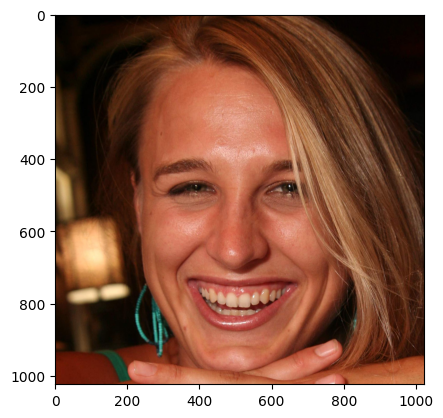

In [7]:
from os import listdir
from os.path import isfile, isdir, join
import matplotlib.pyplot as plt
import io
import cv2

path='app/TrainData/data/'
output_path="app/TrainData/mask/"
files = listdir(path)

all_path=[]
for f in files:
    if f.split('.')[-1]!='png':
        continue
    fullpath=path+f
    if isfile(fullpath):
        all_path.append(fullpath)
all_path[0]


fig=cv2.imread(all_path[0])
plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))

# SMA 自動建立mask

0001.png

In [ ]:

from app.lib.SMILE import SMILE
import numpy as np
import json
from tqdm import tqdm, trange
now=1 #目前1-300結束

times = 0
progress = tqdm(total=len(all_path))

for f in all_path:
    smile=SMILE(f,"")
    filename=str(now).zfill(4)
    smile.find_all_tooth()
    cv2.imwrite(f"{output_path}{filename}.png", smile.boximg)


    #plt.imshow(cv2.cvtColor(smile.boximg,cv2.COLOR_RGB2BGR))
    #plt.axis('on')
    #plt.savefig(f"mask/{filename}.png",bbox_inches='tight',pad_inches=0.0)
    with open(f"{output_path}{filename}.json", 'w') as  f:
        json.dump([p.tolist() for p in smile.tooth.polygons], f)
    now+=1
    progress.update(1)




# 檢查0001.png

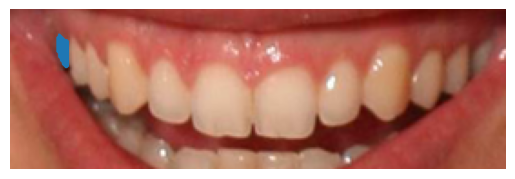

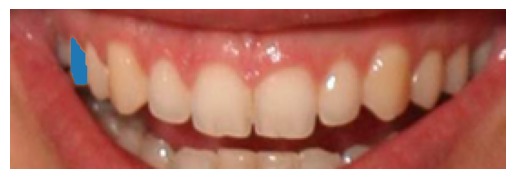

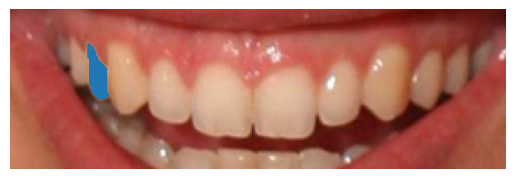

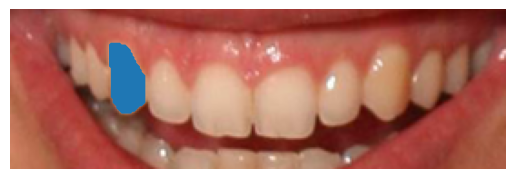

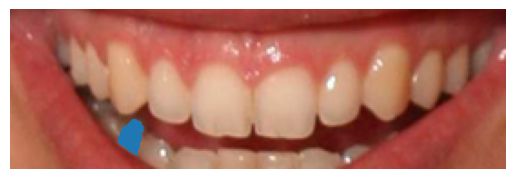

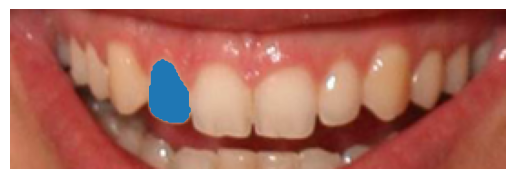

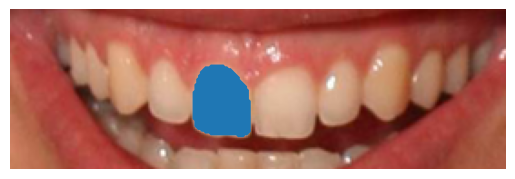

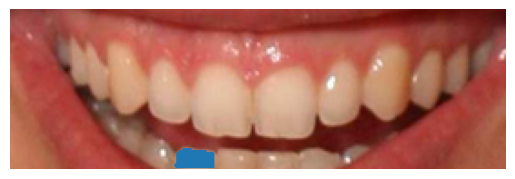

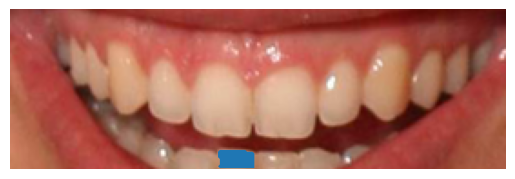

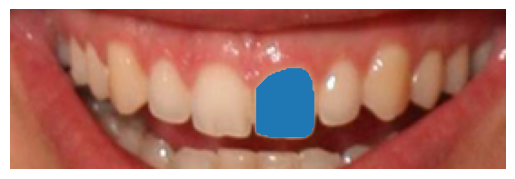

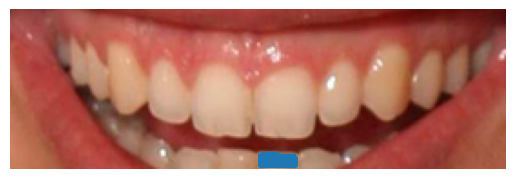

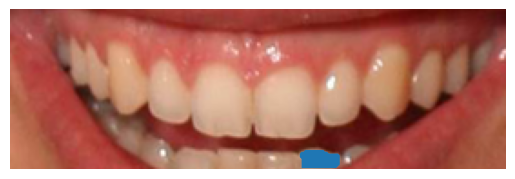

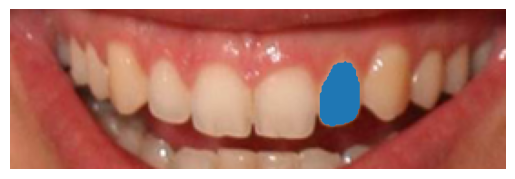

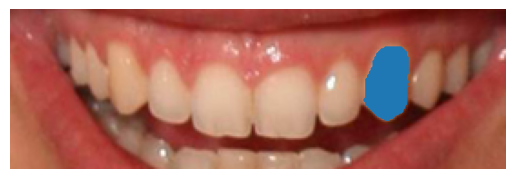

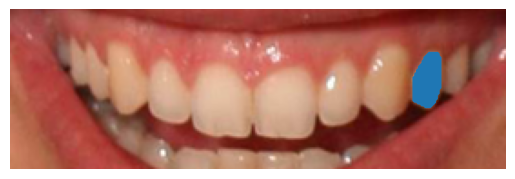

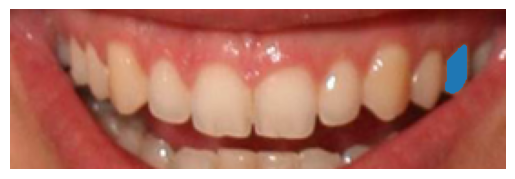

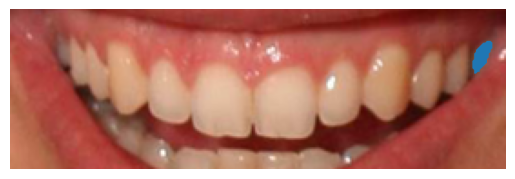

In [8]:
import numpy as np
import json
from tqdm import tqdm, trange
id=1

with open(f"{output_path}{str(id).zfill(4)}.json") as f:
    tooth = json.load(f)
fig=cv2.imread(f"{output_path}{str(id).zfill(4)}.png")

for teeth in tooth:
    teeth=np.array(teeth)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    plt.fill(teeth[:,0],teeth[:,1])
    plt.show()
